In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import QuantileTransformer 
from sklearn.model_selection import train_test_split

In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with QuantileTransformer()

scaler = QuantileTransformer(random_state=0)
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [9]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [37]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((50), batch_input_shape=(None,5,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation = 'relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 208       
Total params: 10,608
Trainable params: 10,608
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(148,5,1), y_train, epochs=1000, validation_data=(x_test.reshape(37,5,1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 2s 13ms/sample - loss: 0.3692 - acc: 0.0000e+00 - val_loss: 0.7752 - val_acc: 0.0000e+00
Epoch 2/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.3344 - acc: 0.0000e+00 - val_loss: 0.7133 - val_acc: 0.0000e+00
Epoch 3/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.2957 - acc: 0.0000e+00 - val_loss: 0.6406 - val_acc: 0.0000e+00
Epoch 4/1000
148/148 [==============================] - 0s 411us/sample - loss: 0.2538 - acc: 0.0000e+00 - val_loss: 0.5487 - val_acc: 0.0000e+00
Epoch 5/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.2006 - acc: 0.0000e+00 - val_loss: 0.4240 - val_acc: 0.0000e+00
Epoch 6/1000
148/148 [==============================] - 0s 431us/sample - loss: 0.1387 - acc: 0.0000e+00 - val_loss: 0.2396 - val_acc: 0.0000e+00
Epoch 7/1000
148/148 [==============================] - 0s 425us/sample - loss: 

Epoch 990/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 991/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0054 - val_acc: 0.0000e+00
Epoch 992/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.3499e-04 - val_acc: 0.0000e+00
Epoch 993/1000
148/148 [==============================] - 0s 297us/sample - loss: 6.3849e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 994/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 995/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 996/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0020 - acc: 0.0000e+

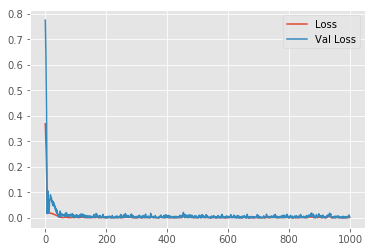

In [40]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [41]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [42]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.46764, 154.46631, 155.46475, 156.4629 , 157.46078, 158.4584 ,
       159.45576, 160.45284, 161.44963, 162.44612, 163.4423 , 164.43822,
       165.43379, 166.4291 , 167.42409, 168.41878, 169.41312, 170.40709,
       171.4008 , 172.39415, 173.38716, 174.37982, 175.37215, 176.36412,
       177.35574, 178.34697, 179.33784, 180.32837, 181.31848, 182.30821,
       183.2976 , 184.28659, 185.27519, 186.26335, 187.25116, 188.23851,
       189.22551], dtype=float32)

In [44]:
# adjusting predicited y_test values by rounding

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [45]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

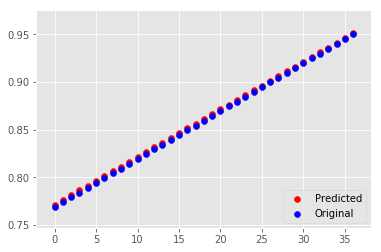

In [46]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

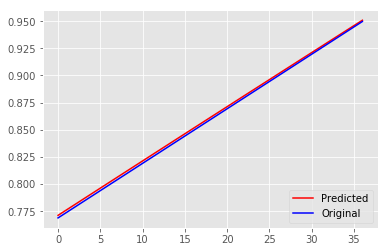

In [47]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [48]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [49]:
result_01

array([0.95583946, 0.96079487, 0.9657482 , 0.9706994 , 0.9756483 ,
       0.9805953 , 0.98553985, 0.9904821 , 0.9954222 , 1.0003603 ],
      dtype=float32)

In [50]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01.reshape(-1,1)).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [51]:
# look into original y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])

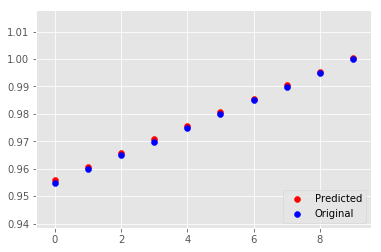

In [52]:
plt.style.use('ggplot')
plt.scatter(range(10), result_01, c='r', label="Predicted")
plt.scatter(range(10),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

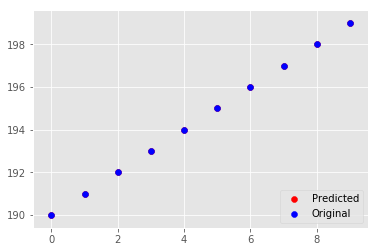

In [53]:
plt.style.use('ggplot')
plt.scatter(range(10), (np.round(scaler.inverse_transform(result_01.reshape(-1,1)))), c='r', label="Predicted")
plt.scatter(range(10),(scaler.inverse_transform(Y_test.reshape(-1,1))), c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()